In [1]:
 #pip install --upgrade tensorflow
 #pip install xgboost

In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
import sklearn
from sklearn.metrics import classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.dummy import DummyClassifier
import xgboost
from xgboost import XGBClassifier

In [3]:
(X_train, y_train), (X_test_final, y_test_final) = fashion_mnist.load_data()

In [4]:
# lets see the distribution of the data 
print("train examples", len(X_train))
print("train outputs", len(y_train))
print("test exmaples", len(X_test_final))
print("test outputs", len(y_test_final))

train examples 60000
train outputs 60000
test exmaples 10000
test outputs 10000


In [5]:
# We notice that the labels are given without explaining which clothes they are supposed to represent - they are represented by numbers. Therefore, we make a list 
# that will store the item names
# instead of 0-9 values
label_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

## Preproccessing

In [6]:
X_train, X_test_final = X_train.reshape(60000, 784), X_test_final.reshape(10000, 784)

In [7]:
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
X_test_final = pd.DataFrame(X_test_final)
y_test_final = pd.DataFrame(y_test_final)

Normilazation

In [8]:
X_train = X_train.astype('float32')
#y_train = y_train.astype('float32')
X_test_final = X_test_final.astype('float32')
#y_test_final = y_test_final.astype('float32')

X_train /= 255.0
X_test_final /= 255.0

In [9]:
X_train , X_test , y_train , y_test = train_test_split(X_train, y_train ,test_size = 0.2 , shuffle = True , random_state = 1)

In [10]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
5004,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
17676,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
29485,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
36476,0.0,0.0,0.000000,0.0,0.007843,0.003922,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.007843,0.0,0.070588,0.811765,0.831373,0.407843,0.0,0.0
45508,0.0,0.0,0.003922,0.0,0.000000,0.000000,0.007843,0.003922,0.0,0.0,...,0.376471,0.317647,0.066667,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0


## Checking for NaNs

In [11]:
# since we got the dataframe from a numpy array, there is no chance there is a NaN.
# we will show that there aren't NaNs.
# move it upward before the split.

In [12]:
print("X_train NaNs", X_train.isna().sum().sum())
print("y_train NaNs", y_train.isna().sum().sum())
print("X_test NaNs", X_test.isna().sum().sum())
print("y_test NaNs", y_test.isna().sum().sum())

X_train NaNs 0
y_train NaNs 0
X_test NaNs 0
y_test NaNs 0


# Simple models without PCA

### KNN:

In [13]:
y_train = np.ravel(y_train)

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
y_pred = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred)
accuracy_knn

0.8533333333333334

### Random forest 

In [16]:
# instantiate the model
rand_forest= RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=0)

# fit the model with data
rand_forest.fit(X_train, y_train)

#make predictions on the testing set (predict for first_test)
y_pred = rand_forest.predict(X_test)

In [17]:
accuracy_rand_forest = metrics.accuracy_score(y_test, y_pred)
accuracy_rand_forest

0.8841666666666667

### SVM

In [18]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy_svm = metrics.accuracy_score(y_test, y_pred)
accuracy_svm

0.8888333333333334

# PCA

In [19]:
pca = PCA(n_components = 0.9)
# using pca show to show where to take
#pca = PCA(n_components = 100)

In [20]:
# figure out what is the difference between pca.fit and pca.fit_transform
# not use pca.fit_transform twice
#https://stackoverflow.com/questions/40366175/handle-incompatible-matrices-shapes-in-tf-idf
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)
X_test_reduced_final = pca.transform(X_test_final)

In [21]:
print("y shape", y_train.shape)
print("x shape", X_train_reduced.shape)

y shape (48000,)
x shape (48000, 84)


In [22]:
print("number of dimensions", X_train_reduced.shape[1])

number of dimensions 84


In [23]:
# find out why we need to use ravel(gives a warning/error otherwise)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

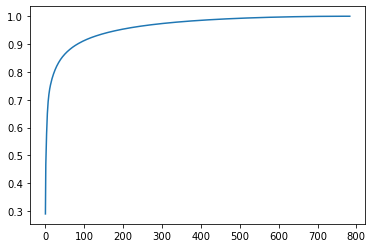

In [24]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)
plt.show()

# Simple Models with PCA

### Dummy classifier

In [25]:
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train_reduced, y_train)

DummyClassifier(strategy='stratified')

In [26]:
y_pred =dummy_clf.predict(X_test_reduced)
accuracy_dummy = accuracy_score(y_test, y_pred)
accuracy_dummy

0.10233333333333333

In [27]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.09      0.09      0.09      1172
           1       0.10      0.11      0.10      1195
           2       0.10      0.11      0.10      1118
           3       0.11      0.11      0.11      1282
           4       0.10      0.10      0.10      1170
           5       0.12      0.11      0.11      1251
           6       0.11      0.10      0.10      1245
           7       0.09      0.10      0.09      1168
           8       0.11      0.11      0.11      1224
           9       0.09      0.10      0.10      1175

    accuracy                           0.10     12000
   macro avg       0.10      0.10      0.10     12000
weighted avg       0.10      0.10      0.10     12000



### preparing dataframe for GridSearch

In [28]:
_, X_minor_train , _ , y_minor_train =  train_test_split(X_train_reduced.copy(), y_train.copy() ,test_size = 0.1
                                                         , shuffle = True , random_state = 1)

### GridSearch on knn

In [29]:
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

In [30]:
grid = GridSearchCV(knn, param_grid, cv = 10, scoring='accuracy')

In [31]:
grid_search=grid.fit(X_minor_train, y_minor_train)

In [32]:
print(grid_search.best_params_)

{'n_neighbors': 8}


### KNN:

In [33]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_reduced, y_train)

KNeighborsClassifier(n_neighbors=8)

In [34]:
y_pred = knn.predict(X_test_reduced)
accuracy_knn = accuracy_score(y_test, y_pred)
accuracy_knn

0.8649166666666667

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83      1166
           1       0.99      0.97      0.98      1213
           2       0.75      0.78      0.76      1232
           3       0.90      0.89      0.89      1209
           4       0.75      0.79      0.77      1159
           5       0.98      0.89      0.94      1217
           6       0.70      0.57      0.63      1178
           7       0.91      0.95      0.93      1215
           8       0.97      0.95      0.96      1178
           9       0.92      0.95      0.93      1233

    accuracy                           0.86     12000
   macro avg       0.86      0.86      0.86     12000
weighted avg       0.87      0.86      0.86     12000



### GridSearch on Random Forest

In [36]:
param_grid = { 
    'n_estimators': [200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' : ['gini', 'entropy']
}
rand_forest= RandomForestClassifier(n_jobs=-1, random_state=0)
rfc = GridSearchCV(estimator=rand_forest, param_grid=param_grid, cv= 5)
rfc.fit(X_minor_train, y_minor_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 300]})

In [37]:
print(rfc.best_params_)

{'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 300}


### Random Forest

In [38]:
rand_forest= RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=0, criterion = 'gini', 
                                   max_features = 'auto')

rand_forest.fit(X_train_reduced, y_train)

y_pred = rand_forest.predict(X_test_reduced)

In [39]:
accuracy_rand_forest = metrics.accuracy_score(y_test, y_pred)
accuracy_rand_forest

0.8715

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1166
           1       1.00      0.96      0.98      1213
           2       0.78      0.80      0.79      1232
           3       0.87      0.90      0.88      1209
           4       0.77      0.82      0.79      1159
           5       0.94      0.94      0.94      1217
           6       0.74      0.58      0.65      1178
           7       0.93      0.93      0.93      1215
           8       0.94      0.95      0.95      1178
           9       0.93      0.94      0.93      1233

    accuracy                           0.87     12000
   macro avg       0.87      0.87      0.87     12000
weighted avg       0.87      0.87      0.87     12000



### Gridsearch for SVM

In [41]:
param_grid = {'C':list(range(5, 20)),
              'gamma': [0.025, 0.02, 0.15, 0.01, 0.005],
              'kernel': ['rbf']}
 
grid = GridSearchCV(svm.SVC(), param_grid, cv = 10)
 
# fitting the model for grid search[]
grid.fit(X_minor_train, y_minor_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                               18, 19],
                         'gamma': [0.025, 0.02, 0.15, 0.01, 0.005],
                         'kernel': ['rbf']})

In [42]:
print(grid.best_params_)

{'C': 7, 'gamma': 0.025, 'kernel': 'rbf'}


### SVM

In [43]:
svm_model = svm.SVC(C = 7, gamma = 0.025, kernel = 'rbf')
svm_model.fit(X_train_reduced, y_train)

SVC(C=7, gamma=0.025)

In [44]:
y_pred = svm_model.predict(X_test_reduced)

In [45]:
accuracy_svm = metrics.accuracy_score(y_test, y_pred)
accuracy_svm

0.9045

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1166
           1       0.99      0.99      0.99      1213
           2       0.83      0.83      0.83      1232
           3       0.91      0.91      0.91      1209
           4       0.83      0.86      0.84      1159
           5       0.98      0.97      0.98      1217
           6       0.77      0.71      0.74      1178
           7       0.95      0.97      0.96      1215
           8       0.98      0.96      0.97      1178
           9       0.97      0.96      0.97      1233

    accuracy                           0.90     12000
   macro avg       0.90      0.90      0.90     12000
weighted avg       0.90      0.90      0.90     12000



# Ensembles

### Voting classifier  - Hard Voting

In [47]:
rand_forest= RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=0, criterion = 'gini', 
                                   max_features = 'auto')
knn = KNeighborsClassifier(n_neighbors=8)
svm_model = svm.SVC(C = 7, gamma = 0.025, kernel = 'rbf', probability = True)

In [48]:
voting_clf = VotingClassifier(estimators = [('sv', svm_model), ('rf', rand_forest), ('kn', knn)], voting = 'hard')

In [49]:
voting_clf.fit(X_train_reduced, y_train)

VotingClassifier(estimators=[('sv', SVC(C=7, gamma=0.025, probability=True)),
                             ('rf',
                              RandomForestClassifier(n_estimators=300,
                                                     n_jobs=-1,
                                                     random_state=0)),
                             ('kn', KNeighborsClassifier(n_neighbors=8))])

In [50]:
y_pred = voting_clf.predict(X_test_reduced)
accuracy_hardVoting = accuracy_score(y_test, y_pred)
accuracy_hardVoting

0.8865833333333333

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      1166
           1       0.99      0.97      0.98      1213
           2       0.79      0.82      0.81      1232
           3       0.89      0.91      0.90      1209
           4       0.79      0.84      0.82      1159
           5       0.98      0.94      0.96      1217
           6       0.77      0.61      0.68      1178
           7       0.93      0.95      0.94      1215
           8       0.97      0.96      0.96      1178
           9       0.94      0.96      0.95      1233

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.88     12000
weighted avg       0.89      0.89      0.89     12000



### Soft Voting

In [52]:
rand_forest= RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=0, criterion = 'gini', 
                                   max_features = 'auto')
knn = KNeighborsClassifier(n_neighbors=8)
svm_model = svm.SVC(C = 7, gamma = 0.025, kernel = 'rbf',probability = True)
voting_clf = VotingClassifier(estimators = [('sv', svm_model), ('rf', rand_forest), ('kn', knn)], voting = 'soft')

In [53]:
voting_clf.fit(X_train_reduced, y_train)

VotingClassifier(estimators=[('sv', SVC(C=7, gamma=0.025, probability=True)),
                             ('rf',
                              RandomForestClassifier(n_estimators=300,
                                                     n_jobs=-1,
                                                     random_state=0)),
                             ('kn', KNeighborsClassifier(n_neighbors=8))],
                 voting='soft')

In [55]:
y_pred = voting_clf.predict(X_test_reduced)
accuracy_softVoting = accuracy_score(y_test, y_pred)
accuracy_softVoting

0.8969166666666667

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1166
           1       0.99      0.98      0.99      1213
           2       0.82      0.82      0.82      1232
           3       0.91      0.91      0.91      1209
           4       0.80      0.85      0.83      1159
           5       0.98      0.95      0.97      1217
           6       0.76      0.67      0.71      1178
           7       0.94      0.96      0.95      1215
           8       0.97      0.97      0.97      1178
           9       0.95      0.96      0.95      1233

    accuracy                           0.90     12000
   macro avg       0.90      0.90      0.90     12000
weighted avg       0.90      0.90      0.90     12000



### Bagging

In [57]:
bag_clf = BaggingClassifier(
 DecisionTreeClassifier(), n_estimators=500,
 max_samples=10000, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train_reduced, y_train)
y_pred = bag_clf.predict(X_test_reduced)

In [58]:
accuracy_bagging = accuracy_score(y_test, y_pred)
accuracy_bagging
# only with 10,000 samples the bagging can be compared to the other models.
# wuth 1,000 and 100 samples, the score is 0.75+ -> 0.79-

0.8445

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1166
           1       0.98      0.95      0.96      1213
           2       0.76      0.77      0.77      1232
           3       0.83      0.87      0.85      1209
           4       0.74      0.79      0.76      1159
           5       0.91      0.92      0.91      1217
           6       0.68      0.54      0.60      1178
           7       0.92      0.90      0.91      1215
           8       0.93      0.93      0.93      1178
           9       0.91      0.93      0.92      1233

    accuracy                           0.84     12000
   macro avg       0.84      0.84      0.84     12000
weighted avg       0.84      0.84      0.84     12000



### Bagging with random patch method

In [60]:
# check adeqaute number for max_features and why
# check if  Random Subspaces method pg 224

In [61]:
bag_clf = BaggingClassifier(
 DecisionTreeClassifier(), n_estimators=500,
 max_samples=10000, max_features= int(X_train_reduced.shape[1] / 2), bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train_reduced, y_train)
y_pred = bag_clf.predict(X_test_reduced)

In [62]:
accuracy_bagging_random = accuracy_score(y_test, y_pred)
accuracy_bagging_random

0.85875

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1166
           1       0.99      0.95      0.97      1213
           2       0.78      0.79      0.79      1232
           3       0.85      0.89      0.87      1209
           4       0.76      0.81      0.78      1159
           5       0.93      0.93      0.93      1217
           6       0.70      0.55      0.62      1178
           7       0.92      0.91      0.92      1215
           8       0.93      0.94      0.94      1178
           9       0.91      0.94      0.93      1233

    accuracy                           0.86     12000
   macro avg       0.86      0.86      0.86     12000
weighted avg       0.86      0.86      0.86     12000



### Adaboost

In [65]:
ada_clf = AdaBoostClassifier(
 DecisionTreeClassifier(max_depth=1), n_estimators=300,
 algorithm="SAMME.R", learning_rate=0.4)
ada_clf.fit(X_train_reduced, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.4, n_estimators=300)

In [66]:
y_pred = ada_clf.predict(X_test_reduced)

In [67]:
accuracy_adaboost = accuracy_score(y_test, y_pred)

In [68]:
accuracy_adaboost

0.57925

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.17      0.27      1166
           1       0.78      0.64      0.70      1213
           2       0.43      0.40      0.42      1232
           3       0.40      0.86      0.55      1209
           4       0.48      0.58      0.52      1159
           5       0.69      0.74      0.71      1217
           6       0.24      0.13      0.17      1178
           7       0.58      0.72      0.64      1215
           8       0.83      0.92      0.87      1178
           9       0.91      0.61      0.73      1233

    accuracy                           0.58     12000
   macro avg       0.60      0.58      0.56     12000
weighted avg       0.60      0.58      0.56     12000



### Xgb

In [70]:
xgb=xgboost.XGBClassifier(n_estimators=200,eval_metric='mlogloss')
xgb.fit(X_train_reduced,y_train)
y_pred = xgb.predict(X_test_reduced)

In [71]:
accuracy_xgb = accuracy_score(y_test, y_pred)
accuracy_xgb

0.8866666666666667

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1166
           1       0.99      0.97      0.98      1213
           2       0.81      0.80      0.81      1232
           3       0.90      0.90      0.90      1209
           4       0.79      0.84      0.82      1159
           5       0.97      0.95      0.96      1217
           6       0.72      0.66      0.69      1178
           7       0.93      0.95      0.94      1215
           8       0.96      0.96      0.96      1178
           9       0.94      0.95      0.95      1233

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000



### Soft voting with the best models

In [81]:
xgb = xgboost.XGBClassifier(n_estimators=300,eval_metric='mlogloss')
knn = KNeighborsClassifier(n_neighbors=8)
rand_forest= RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=0, criterion = 'gini', 
                                   max_features = 'auto')
svm_model = svm.SVC(C = 7, gamma = 0.025, kernel = 'rbf',probability = True)

voting_clf = VotingClassifier(estimators = [('xg', xgb), ('rf', rand_forest), ('kn', knn), ('sv', svm_model)], voting = 'soft')

In [82]:
voting_clf.fit(X_train_reduced, y_train)

VotingClassifier(estimators=[('xg',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss', gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bi...
                                            min_child_weight=None, missing=nan,
                                    

In [84]:
y_pred = voting_clf.predict(X_test_reduced)
acuuracy_softVoting_best = accuracy_score(y_test, y_pred)
acuuracy_softVoting_best

0.89775

In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1166
           1       1.00      0.98      0.99      1213
           2       0.83      0.82      0.82      1232
           3       0.91      0.91      0.91      1209
           4       0.80      0.86      0.83      1159
           5       0.98      0.95      0.97      1217
           6       0.76      0.67      0.72      1178
           7       0.94      0.96      0.95      1215
           8       0.96      0.97      0.96      1178
           9       0.95      0.96      0.96      1233

    accuracy                           0.90     12000
   macro avg       0.90      0.90      0.90     12000
weighted avg       0.90      0.90      0.90     12000



### Final model

In [76]:
xgb = xgboost.XGBClassifier(n_estimators=200,eval_metric='mlogloss')
knn = KNeighborsClassifier(n_neighbors=8)
rand_forest= RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=0, criterion = 'gini', 
                                   max_features = 'auto')
svm_model = svm.SVC(C = 7, gamma = 0.025, kernel = 'rbf', probability = True)
voting_clf = VotingClassifier(estimators = [('xg', xgb), ('rf', rand_forest), ('kn', knn), ('sv', svm_model)], voting = 'soft')

In [77]:
voting_clf.fit(X_train_reduced, y_train)

VotingClassifier(estimators=[('xg',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss', gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bi...
                                            min_child_weight=None, missing=nan,
                                    

In [78]:
y_pred = voting_clf.predict(X_test_reduced_final)
voting_score = accuracy_score(y_test_final, y_pred)
voting_score

0.889

In [80]:
print(classification_report(y_test_final, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.81      0.81      1000
           3       0.90      0.90      0.90      1000
           4       0.81      0.83      0.82      1000
           5       0.98      0.95      0.96      1000
           6       0.73      0.67      0.70      1000
           7       0.93      0.96      0.95      1000
           8       0.96      0.98      0.97      1000
           9       0.95      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



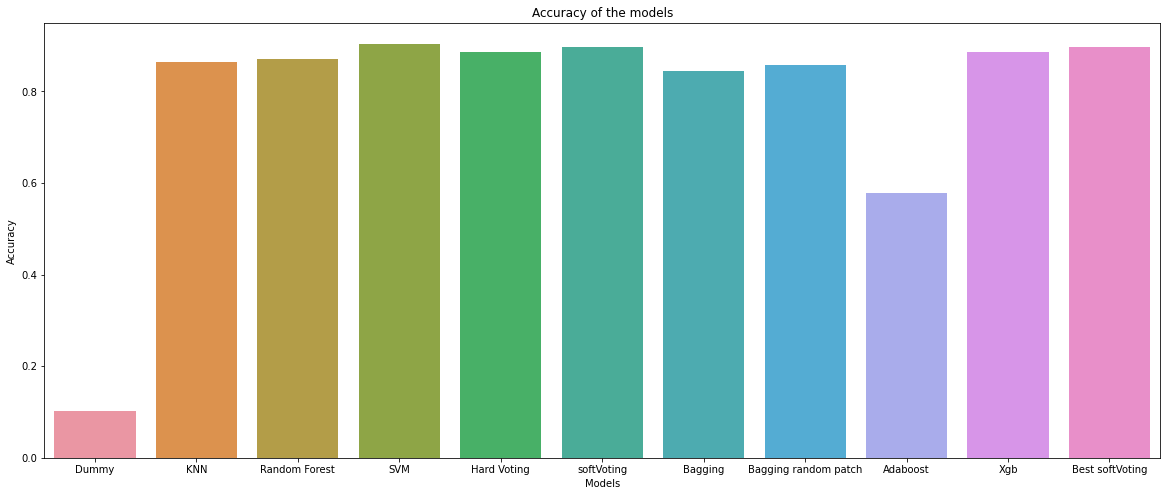

In [99]:
accArr = [accuracy_dummy, accuracy_knn, accuracy_rand_forest, accuracy_svm, accuracy_hardVoting, accuracy_softVoting, 
          accuracy_bagging,accuracy_bagging_random, accuracy_adaboost, accuracy_xgb, acuuracy_softVoting_best,
                ]
fig = plt.figure(figsize=(20,8))
labels = ['Dummy','KNN', 'Random Forest','SVM','Hard Voting', 'softVoting','Bagging','Bagging random patch', 'Adaboost'
         , 'Xgb', 'Best softVoting']
sns.barplot(x=labels, y=accArr)
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.title('Accuracy of the models');